<a href="https://colab.research.google.com/github/SuryaSankar18/BTech_Projects/blob/main/VisualQuestionAnswering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please capture an image from the webcam.


<IPython.core.display.Javascript object>

Captured Image:


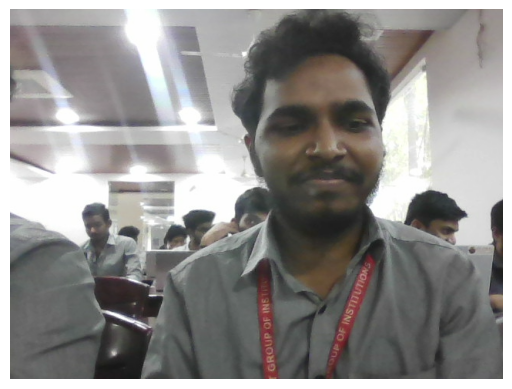

Loading BLIP model... Please wait.
Question: What is the color of shirt?
Processing image and generating an answer...
Answer: gray


In [3]:
# Import required libraries
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering
from IPython.display import display, Javascript
from google.colab.output import eval_js
import cv2
import numpy as np
import base64
import matplotlib.pyplot as plt  # For displaying images in Colab

# Function to capture image from the webcam
def capture_image_from_webcam():
    display(Javascript('''
        async function captureImage() {
            const div = document.createElement('div');
            document.body.appendChild(div);
            const video = document.createElement('video');
            video.style.display = 'block';
            div.appendChild(video);

            // Request access to the webcam
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            // Create a button to capture the frame
            const button = document.createElement('button');
            button.innerText = 'Capture Image';
            div.appendChild(button);

            await new Promise((resolve) => button.onclick = resolve);

            // Capture the frame from the webcam
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            const ctx = canvas.getContext('2d');
            ctx.drawImage(video, 0, 0);

            // Stop the video stream
            stream.getTracks().forEach(track => track.stop());

            const imageDataUrl = canvas.toDataURL('image/png');
            div.remove();
            return imageDataUrl;
        }
    '''))
    # Call the JavaScript function that has been injected into the notebook
    data_url = eval_js('captureImage()')
    return data_url

def convert_data_url_to_image(data_url):
    # Decode base64 image from Data URL to an image
    encoded_data = data_url.split(',')[1]
    nparr = np.frombuffer(base64.b64decode(encoded_data), np.uint8)
    image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV format) to RGB (PIL format)
    return Image.fromarray(image)

# Step 1: Capture image from webcam
print("Please capture an image from the webcam.")
data_url = capture_image_from_webcam()
raw_image = convert_data_url_to_image(data_url)

# *Display the captured image*
print("Captured Image:")

# *Option 1: Display the image using matplotlib*
plt.imshow(raw_image)
plt.axis('off')  # Hide axis for cleaner display
plt.show()

# Step 2: Load the BLIP model and processor
print("Loading BLIP model... Please wait.")
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

# Step 3: Ask a question about the image
question = "What is the color of shirt?"
print(f"Question: {question}")
inputs = processor(raw_image, question, return_tensors="pt")

# Step 4: Generate an answer using the BLIP model
print("Processing image and generating an answer...")
out = model.generate(**inputs)
answer = processor.decode(out[0], skip_special_tokens=True)

# *Display the answer*
print("Answer:", answer)